# Gauss Seidel Method

Gauss Seidel method is another stationary iterative method for solving a linear system $$A{\bf x}={\bf b}$$ It splits the matrix $A=D+U+L$, where $D$ represents the diagonal of the matrix $A$, and $U$ and $L$ represent the upper and lower triangular parts of the matrix $A$, respectively. Let ${\bf x}^{(k)}$ denotes the $k$-th iteration of the approximated solution, then the Gauss Seidel method reads $${\bf x}^{(k+1)}=(L+D)^{-1}\left({\bf b}-U{\bf x}^{(k)}\right)$$

Or componentwisely, it can be written as

$$x_i^{(k+1)}=\frac{1}{a_{ii}}\left(b_i-\sum_{j=0}^{i-1}a_{ij}x_j^{(k+1)}-\sum_{j=i+1}^{n}a_{ij}x_j^{(k)}\right)$$

* Now, let's try to use Gauss Seidel Method to solve a one dimentional Poissons equation:
$$-u_{xx}=\pi^2\sin{\pi x} \quad\text{ for } x\in(0,1)$$
$$\text{with}\quad u(0)=u(1)=0$$


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.sparse as sp
import numpy as np

In [22]:
def Poisson1D_GS_OneStep(b, u, stencil = [-1, 2, -1]):
    n = u.shape[0]
    r = 0
    for i in range(1, n-1):
        u[i] = (b[i]-stencil[0]*u[i-1]-stencil[2]*u[i+1])/stencil[1]
        
    for i in range(1, n-1):
        r += (b[i]-stencil[0]*u[i-1]-stencil[1]*u[i]-stencil[2]*u[i+1])**2
    r = np.sqrt(r)
    return u, r

def Poisson1D_GS(f, n, domain=[0,1], bdry_cond=[0,0], eps=1e-5, stencil=[-1, 2, -1]):
    # set up the numerical parameters, as well as initial step. 
    x = np.linspace(domain[0],domain[1],n+1)
    h = (domain[1]-domain[0])/n
    b = f(x)*h**2
    u = np.zeros(n+1)
    u[0] = bdry_cond[0]
    u[-1] = bdry_cond[1]
    # for loop or while loop for the iterations. 
    num_iter = 0
    r = 1
    R = np.array([])
    while r>eps and num_iter<100000:
        u, r = Poisson1D_GS_OneStep(b, u, stencil=stencil)
        num_iter += 1
        R = np.append(R,r)
    return u, num_iter, R

In [23]:
def Poisson1D_Jacobi_OneStep(b, u, stencil = [-1, 2, -1]):
    v = np.copy(u)
    n = u.shape[0]
    for i in range(1, n-1):
        v[i] = (b[i]-stencil[0]*u[i-1]-stencil[2]*u[i+1])/stencil[1]
        
    r = 0
    for i in range(1, n-1):
        r += (b[i]-stencil[0]*u[i-1]-stencil[1]*u[i]-stencil[2]*u[i+1])**2
    r = np.sqrt(r)
    return v, r

def Poisson1D_Jacobi(f, n, domain=[0,1], bdry_cond=[0,0], eps=1e-5, stencil=[-1, 2, -1]):
    # set up the numerical parameters, as well as initial step. 
    x = np.linspace(domain[0],domain[1],n+1)
    h = (domain[1]-domain[0])/n
    b = f(x)*h**2
    u = np.zeros(n+1)
    u[0] = bdry_cond[0]
    u[-1] = bdry_cond[1]
    # for loop or while loop for the iterations. 
    num_iter = 0
    r = 1
    R = np.array([])
    while r>eps and num_iter<100000:
        u, r = Poisson1D_Jacobi_OneStep(b, u, stencil=stencil)
        num_iter += 1
        R = np.append(R,r)
    return u, num_iter, R

(6635, 13268)

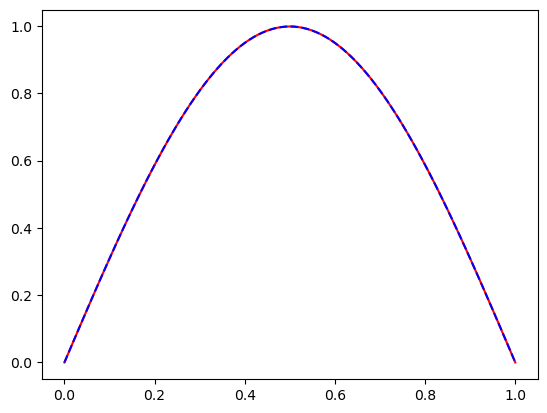

In [26]:
f1 = lambda x: np.pi**2*np.sin(np.pi*x)
n1 = 100
u_gs, num_gs, r_gs = Poisson1D_GS(f1, n1)
u_j, num_j, r_j = Poisson1D_Jacobi(f1, n1)
x = np.linspace(0,1,n1+1)
plt.plot(x, u_gs,'r')
plt.plot(x, u_j,'b--')
num_gs, num_j

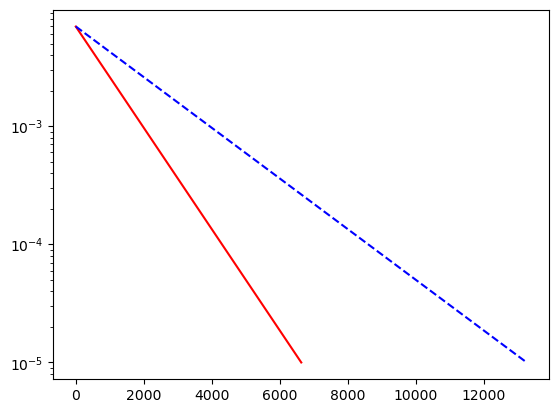

In [28]:
plt.plot(r_gs,'r')
plt.plot(r_j,'b--')
plt.yscale(value="log")

## Successive Over Relaxing method

with $1<\omega<2$,
$$x_i^{(k+1)}=(1-\omega) x_i^{(k)}+\omega\frac{1}{a_{ii}}\left(b_i-\sum_{j=0}^{i-1}a_{ij}x_j^{(k+1)}-\sum_{j=i+1}^{n}a_{ij}x_j^{(k)}\right)$$

* Let's try to use Gauss Seidel Method to solve a $2D$ Poissons equation. 
$$-u_{xx}-u_{yy}=2\pi^2\sin{\pi x}\cos{\pi y} \quad\text{ for } x\in(0,1)\text{ and } y\in(0,1)$$
$$\text{with}\quad u(0,y)=u(1,y)=0$$
$$\text{and }\quad u(x,0)=\sin{\pi x}\quad u(x,1)=-\sin{\pi x}$$

In [29]:
def Poisson1D_SOR_OneStep(b, u, stencil = [-1, 2, -1], omega=1.5):
    n = u.shape[0]
    r = 0
    for i in range(1, n-1):
        u[i] = (1-omega)*u[i]+omega*(b[i]-stencil[0]*u[i-1]-stencil[2]*u[i+1])/stencil[1]
        
    for i in range(1, n-1):
        r += (b[i]-stencil[0]*u[i-1]-stencil[1]*u[i]-stencil[2]*u[i+1])**2
    r = np.sqrt(r)
    return u, r

def Poisson1D_SOR(f, n, domain=[0,1], bdry_cond=[0,0], eps=1e-5, stencil=[-1, 2, -1]):
    # set up the numerical parameters, as well as initial step. 
    x = np.linspace(domain[0],domain[1],n+1)
    h = (domain[1]-domain[0])/n
    b = f(x)*h**2
    u = np.zeros(n+1)
    u[0] = bdry_cond[0]
    u[-1] = bdry_cond[1]
    # for loop or while loop for the iterations. 
    num_iter = 0
    r = 1
    R = np.array([])
    while r>eps and num_iter<100000:
        u, r = Poisson1D_SOR_OneStep(b, u, stencil=stencil)
        num_iter += 1
        R = np.append(R,r)
    return u, num_iter, R

(2211, 6635, 13268)

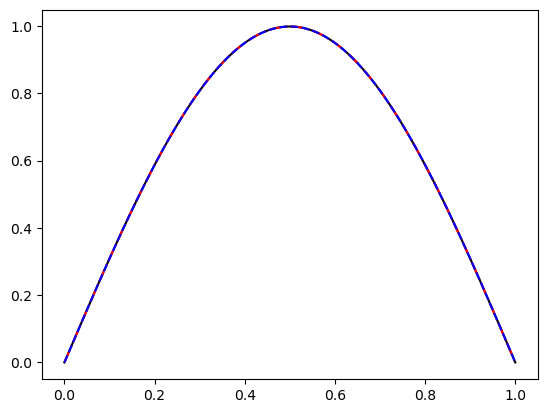

In [33]:
f1 = lambda x: np.pi**2*np.sin(np.pi*x)
n1 = 100
u_sor, num_sor, r_sor = Poisson1D_SOR(f1, n1)
u_gs, num_gs, r_gs = Poisson1D_GS(f1, n1)
u_j, num_j, r_j = Poisson1D_Jacobi(f1, n1)
x = np.linspace(0,1,n1+1)
plt.plot(x, u_sor,'k')
plt.plot(x, u_gs,'r-.')
plt.plot(x, u_j,'b--')
num_sor, num_gs, num_j

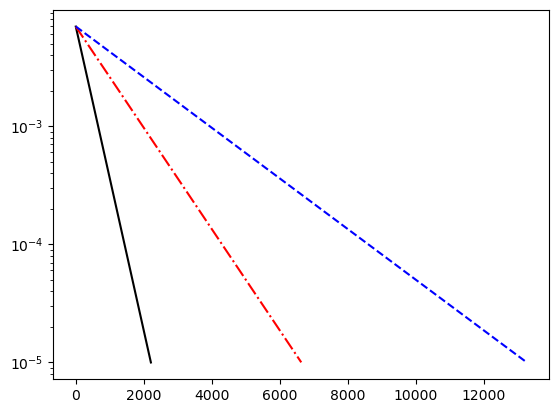

In [37]:
plt.plot(r_sor,'k')
plt.plot(r_gs,'r-.')
plt.plot(r_j,'b--')
plt.yscale(value="log")


### Error Analysis on Jacobi and Gauss Seidel methods

For a linear system $A{\bf x}={\bf b}$
* the error is defined as: $$e^{(k)}=\|{\bf x}^{(k)}-{\bf x}\|_{2}=\sqrt{\sum_{i=1}^{n}\left(x^{(k)}_i-x_i\right)^2}$$
* the residue is defined as: $$r^{(k)}=\|{\bf b}-A{\bf x}^{(k)}\|_{2}=\sqrt{\sum_{i=1}^{n}\left(b_i-\sum_{j=1}^{n}A_{ij}x_j^{(k)}\right)^2}$$

* Now instead of using for-loops, we can use while-loops to implement Jacobi and Gauss Seidel methods. 
* The stopping criteria for the while loop should be $r^{(k)}<\epsilon$